<a href="https://colab.research.google.com/github/bgswaroop/python-matplotlib/blob/master/Matplotlib_Part8_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 8 : Time Series Plots


---


Scatter Plots allows us to represent the relation between two variables.

This notebook is a continuation from Parts 1-7. 

*    Part1 - Introduction with line plots
*    Part2 - Bar plots
*    Part3 - Pie plots
*    Part4 - Stacked plots
*    Part5 - Fill betweens
*    Part6 - Histograms
*    Part7 - Scatter Plots

Lets write some quick starter code to understand time series plots !


In [0]:
# !pip install timedate

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


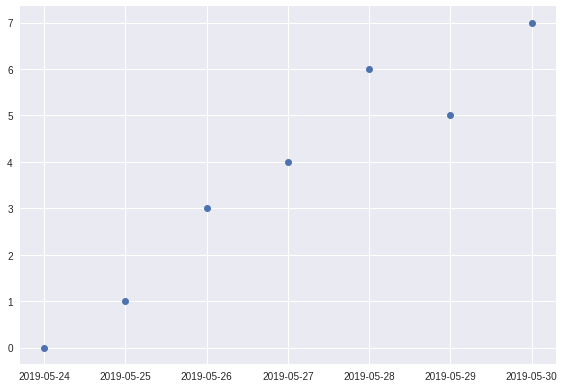

In [4]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y)

plt.tight_layout()
plt.show()

These are useful to visualize some outliers.

Lets format the scatter plots :
*    **linestyle** - solid : this will connect all the markers

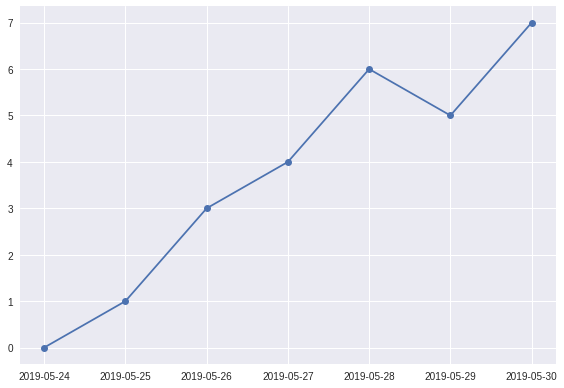

In [5]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid')

plt.tight_layout()
plt.show()

To get the current figure from pyplt we can use **plt.gcf()**

We can auto-format this figure.

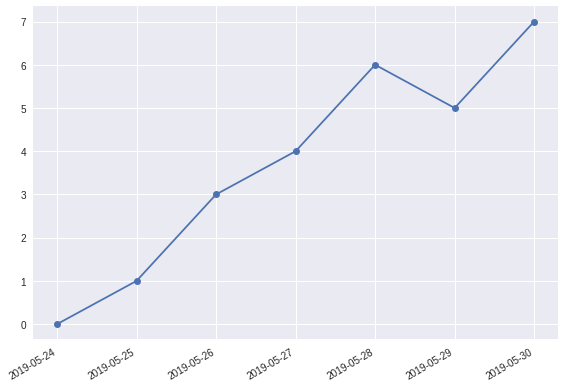

In [6]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid')
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

We can change the formatting for the dates.
Datetime Format Codes - http://bit.ly/python-dt-fmt

Just like formatting a figure, we can also format a axis :

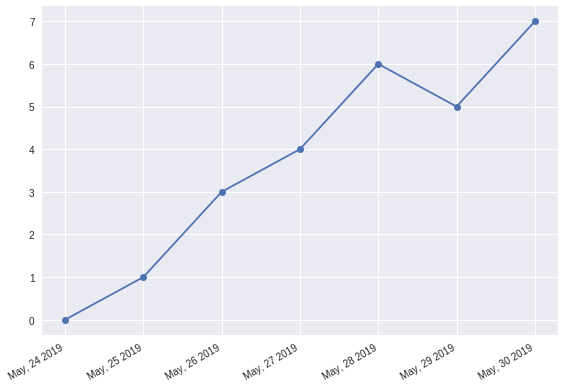

In [12]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]
#print(dates)
y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid')
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

Lets now load data from a csv file. The csv_file contains some bitcoin data for two weeks.

Note that I have converted the Date column read from the .csv file into datetime object.

--2019-10-04 13:49:40--  https://raw.githubusercontent.com/bgswaroop/python-matplotlib/master/data/part8_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1175 (1.1K) [text/plain]
Saving to: ‘/tmp/part8_data.csv’

/tmp/part8_data.csv 100%[===================>]   1.15K  --.-KB/s    in 0s      

2019-10-04 13:49:40 (176 MB/s) - ‘/tmp/part8_data.csv’ saved [1175/1175]



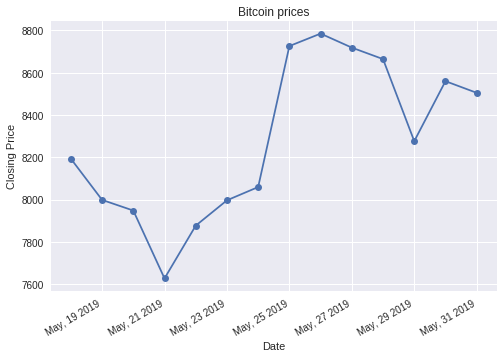

In [15]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

!wget --no-check-certificate \
'https://raw.githubusercontent.com/bgswaroop/python-matplotlib/master/data/part8_data.csv' \
-O '/tmp/part8_data.csv'

data = pd.read_csv('/tmp/part8_data.csv')
price_date = pd.to_datetime(data['Date'])
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

#plt.tight_layout()
plt.title('Bitcoin prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Not always, the data that we have will be in sorted order. So we will have to sort the data by date. We can do this in-plcae using pandas as shown below. 

Since our data in the csv file is already sorted, we will not notice any difference between the plots. But it is always recommended to sort by date.

--2019-10-04 13:58:19--  https://raw.githubusercontent.com/bgswaroop/python-matplotlib/master/data/part8_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1175 (1.1K) [text/plain]
Saving to: ‘/tmp/part8_data.csv’

/tmp/part8_data.csv 100%[===================>]   1.15K  --.-KB/s    in 0s      

2019-10-04 13:58:20 (117 MB/s) - ‘/tmp/part8_data.csv’ saved [1175/1175]



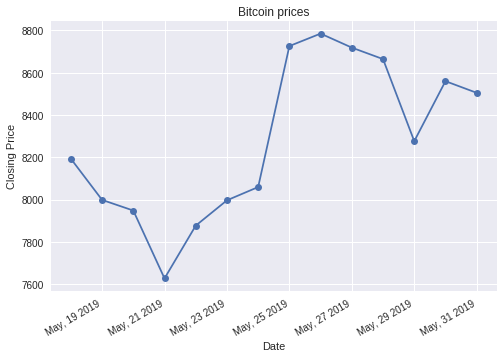

In [17]:
import pandas as pd
from datetime import datetime # built-in python module
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

!wget --no-check-certificate \
'https://raw.githubusercontent.com/bgswaroop/python-matplotlib/master/data/part8_data.csv' \
-O '/tmp/part8_data.csv'

data = pd.read_csv('/tmp/part8_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

#plt.tight_layout()
plt.title('Bitcoin prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()